In [2]:
# Import libs 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

import matplotlib

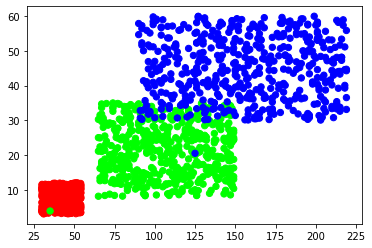

In [3]:
# Read in data 
data = pd.read_csv('MLP1.csv')
sepData = data[['W', 'D', 'Kg']]
sepData = np.asarray(sepData)

outputs = data[['A', 'B', 'C']]
outputs = np.asarray(outputs)

# Take a look at what the data looks like
plt.scatter(sepData[:,0], sepData[:,2], s=40, c=outputs, cmap=plt.cm.Spectral)

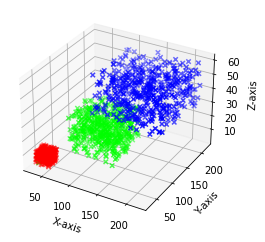

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = sepData[:, 0]
y_vals = sepData[:, 1]
z_vals = sepData[:, 2]

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = outputs, marker='x')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

In [5]:
print(len(sepData))

1500


In [6]:
print(len(outputs))

1500


In [7]:
# Def activation functions
def actSigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigDeriv(x):
    return actSigmoid(x) * (1 - actSigmoid(x))

In [8]:
# Def Learning Rate
LR = 0.5
# Def input dimensionality /no input layers
inputDim = 3
# Def hidden dimensionality 
hiddenDim = 4

In [9]:
# Define no of training epochs 
epochCount = 5

In [10]:
# Randomly assign arbitrary weight between -1 and 1
inToHidW = np.random.uniform(-1, 1, (inputDim, hiddenDim))
hidToOutW = np.random.uniform(-1, 1, (hiddenDim))

In [11]:
# Create empty array to hold pre and post activation vals for hidden 
preActHidden = np.zeros(hiddenDim)
postActHidden = np.zeros(hiddenDim)

In [17]:
# Test Train Split
trainData = sepData[:1200]
testData = sepData[1200:1400]
validationData = sepData[1400:]

trainOut = outputs[:1200]
testOut = outputs[1200:1400]
validationOut = outputs[1400:]

In [22]:
# Store No of Samples
trainCount = len(trainData[:,0])
testCount = len(testData[:,0])
validCount = len(validationData[:,0])

In [26]:
# Train MLP 
    #  FW prop
for epoch in range(epochCount):
    for sample in range(trainCount):
        for node in range(hiddenDim):
            preActHidden[node] = np.dot(trainData[sample, :], inToHidW[:, node])
            postActHidden[node] = actSigmoid(preActHidden[node])
            
        #calc pre and post act signal
        preActO = np.dot(postActHidden, hidToOutW)
        postActO = actSigmoid(preActO)
            
        #Calc final error
        finalError = postActO - trainOut[sample]
            
            #BK Prop
        for hiddenNode in range(hiddenDim):
            #Calc s error for hid 2 out and in 2 hid gradient
            sError = finalError * sigDeriv(preActO)
            gradHidToOut = sError * postActHidden[hiddenNode]
                
            for inputNode in range(inputDim):
                inVal = trainData[sample, inputNode]
                gradInToHid = sError * hidToOutW[hiddenNode] * sigDeriv(preActHidden[hiddenNode]) * inVal
                    
                #Update weights then begin loop again
                inToHidW[inputNode, hiddenNode] -= LR * gradInToHid
            hidToOutW[hiddenNode] -= LR * gradHidToOut

ValueError: setting an array element with a sequence.

In [28]:
# Validation 
correctClassCount = 0

for sample in range(validCount):
    for node in range(hiddenDim):
        preActHidden[node] = np.dot(validationData[sample,:], inToHidW[:, node])
        postActHidden[node] = actSigmoid(preActHidden[node])
        
    preActO = np.dot(postActHidden, hidToOutW)
    postActO = actSigmoid(preActO)
        
    if postActO > 0.5:
        output = 1
    else:
        output = 0
            
    if output == validationOut[sample]:
        correctClassCount += 1

correctPC = correctClassCount*100/validCount           
print(f"Percentage of correct Classifications: {correctPC}%")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()